| ESCUELA POLITÉCNICA NACIONAL  |                              | **Proyecto** |
|-------------------------------|------------------------------|--------------|
| **Estructuras de Datos y Algoritmos II – Computación**     | |       1      |
| NOMBRES: Brandon Ismael Freire|                              |              |

### 1. Objetivos

- Explicar los conceptos fundamentales de DFS, sus propiedades y cómo se aplica en grafos, tanto en la versión recursiva como en la implementación con pila.

- Desarrollar el código de DFS usando Python, ya sea de manera recursiva o mediante el uso de una pila, garantizando que el algoritmo recorra el grafo correctamente desde el nodo de inicio.

- Construir el árbol DFS a partir del recorrido del algoritmo, y asegurarse de que represente a los nodos conectados desde el nodo de inicio (Start), destacando la estructura y el orden de descubrimiento de los nodos.

- Aplicar el algoritmo a un ejemplo de grafo, similar al visto en clase, y validar que el recorrido y la generación del árbol DFS sean correctos.

- Identificar y explicar las estructuras de datos (como listas o pilas) necesarias para realizar el seguimiento de los nodos visitados y el camino seguido durante el recorrido, evaluando su importancia en la implementación eficiente del algoritmo y la obtención del DFS Tree.


## 2. Introducción

En el análisis, desarrollo y procesamiento de grafos, el algoritmo de Búsqueda en Profundidad (DFS, por sus siglas en inglés, Depth-First Search) tiene gran relevancia debido a su capacidad para explorar completamente cada componente conectado de un grafo, abarcando desde el nodo de inicio hasta cada uno de sus nodos alcanzables. DFS es un enfoque de recorrido que se adentra tanto como sea posible en cada rama del grafo antes de retroceder, siendo particularmente útil para la generación de árboles de expansión, detección de ciclos, y para problemas que requieren analizar todas las rutas posibles entre nodos.

Existen dos formas principales de implementar el algoritmo DFS: utilizando una pila o mediante recursividad. En la implementación con pila, se inicia el recorrido añadiendo el nodo de inicio a una estructura de pila y, mientras esta no esté vacía, se extrae el último nodo añadido (el nodo "actual") y se visita cada uno de sus vecinos no visitados, añadiéndolos a la pila para su posterior exploración. Este enfoque permite simular la estructura de llamada que realiza la recursividad, ofreciendo un control más explícito sobre el recorrido. Por otro lado, la implementación recursiva utiliza llamadas a funciones anidadas para alcanzar nodos más profundos: desde cada nodo visitado, se llama a DFS en cada uno de sus vecinos no visitados, lo cual permite que el flujo de la recursión maneje automáticamente el retroceso al nodo previo una vez que se han explorado todos los caminos posibles desde el nodo actual.

Este informe tiene como objetivo implementar el algoritmo DFS, generando el árbol de recorrido DFS (DFS Tree) a partir de un nodo inicial especificado, denominado "Start". La implementación incluirá estructuras auxiliares que permitirán realizar el seguimiento de los nodos visitados y el camino de descubrimiento, utilizando una pila o recursividad, de acuerdo con las estrategias de DFS. Además, el algoritmo se pondrá a prueba mediante los ejemplos prácticos planteados para validar su correcta ejecución y su capacidad de explorar completamente los nodos conectados al nodo de inicio.

Con ello, se busca profundizar en la comprensión del algoritmo DFS y sus aplicaciones en grafos, mostrando no solo su funcionamiento teórico, sino también su aplicabilidad práctica en problemas de recorrido de grafos.

## 3. Ejercicios planteados y/o programas implementados

### a) Genere el árbol DFS (DFS Tree) para el grafo G, sabiendo que el nodo de inicio es Start. Ese sería el componente conectado que contiene al nodo Start. Implemente el algoritmo DFS (recursivo o con uso de pila) y use las estructuras auxiliares necesarias.

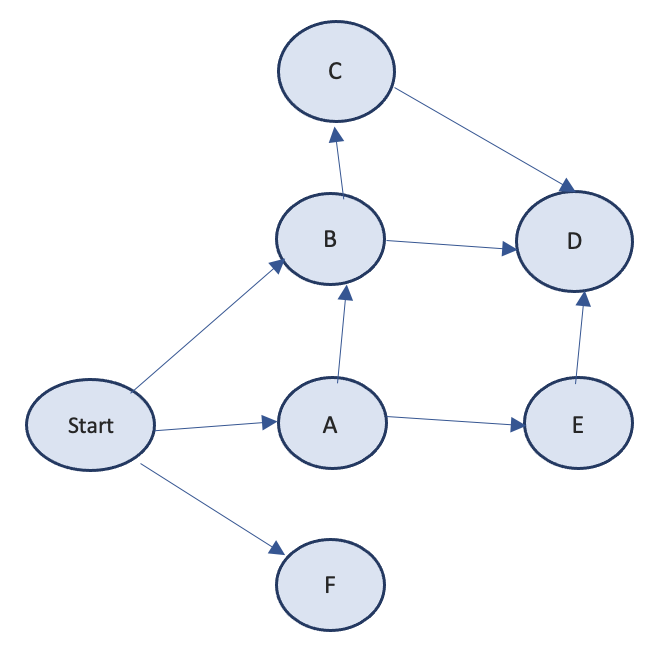


Para hallar el árbol DFS, primero se debe pasar el grafo dado a una estructura de tipo diccionario que permita su manejo en la función mencionada. Así mismo, es importante declarar las estrcturas de control auxiliares, las cuales son *parents* y *searched*.

La primera, *parents*, se utiliza para almacenar al nodo predecedor de cada nodo visitado. Esto permite construir el camino recorrido en el grafo, desde el nodo inicial hasta el nodo alcanzable. La segunda, *searched*, es una colección que guarda los nodos que ya han sido visitados durante el recorrido. Principalmente sirve para evitar que el algoritmo explore repetidamente los mismos nodos, lo que es crucial para prevenir ciclos y reducir el coste computacional.

In [1]:
# creacion del diccionario que almacenará el grafo dado
graph_1 = {
    "Start":["F", "A", "B"],
    "F": "",
    "A":["E","B"],
    "B":["C","D"],
    "E":"D",
    "C":"D",
    "D":""
}
print(graph_1)

# defincion de un diccionario que permita hallar los padres de cada nodo
parent = {
    "Start": None,
    "F": None,
    "A": None,
    "B": None,
    "E": None,
    "C": None,
    "D": None
}

# definición de un diccionario que permita marcar a los nodos como visitados
searched = {
    "Start": False,
    "F": False,
    "A": False,
    "B": False,
    "E": False,
    "C": False,
    "D": False
}

{'Start': ['F', 'A', 'B'], 'F': '', 'A': ['E', 'B'], 'B': ['C', 'D'], 'E': 'D', 'C': 'D', 'D': ''}


Seguidamente, se crea la funcion DFS la cual recibe al *nodo*, *grafo*, al diccionario *searched*, la ruta *path* que incialmente se le pasa como una lista vacía y al diccionario *parent*. 

Dentro de la función, a partir de un nodo inicial, la función marca cada nodo como visitado y lo añade al camino recorrido (path). Luego, para cada vecino no visitado, establece el nodo actual como su "padre" en el diccionario parent, lo que permite reconstruir el árbol DFS. La función sigue explorando recursivamente cada vecino hasta que se han visitado todos los nodos conectados. Al final, parent contiene la estructura del árbol DFS, mostrando y retornando la relación de cada nodo con su predecesor en el recorrido.

In [2]:
# creación de la función DFS que contenga al algoritmo recursivo requerido
def DFS (nodo, grafo, searched : dict, path, parent : dict):
    path.append(nodo)
    searched[nodo] = True # marca nodo como visitado 
    print(searched)
    if grafo[nodo] != "":
        print("Los vecinos de {} son {}".format(nodo, grafo[nodo]))
    else:
        print("Los vecinos de {} son Ninguno".format(nodo))

    for vecino in grafo[nodo]:
        if not searched[vecino]:
            parent[vecino] = nodo
            # llamada recursiva
            DFS(vecino, grafo, searched, path, parent)
            print("Finaliza en ", vecino)
            print("Vuelve a", nodo)
            print()
    return parent

Previo a la llamada de la función, se especifica el nodo de inicio, se imprime el diccionario de buscados y se incializa el *path* como vacío, luego se guarda en una variable el valor de la ruta retornada por la función DFS, que servirá para contruir el árbol, y se imprime la ruta que ha seguido el algoritmo.

In [3]:
# llamada de la función
nodoStart = "Start"
print(searched)
path = []

DFS_Tree = DFS(nodoStart, graph_1, searched, path, parent)

print(DFS_Tree)
print("La busqueda DFS es: ", path)

{'Start': False, 'F': False, 'A': False, 'B': False, 'E': False, 'C': False, 'D': False}
{'Start': True, 'F': False, 'A': False, 'B': False, 'E': False, 'C': False, 'D': False}
Los vecinos de Start son ['F', 'A', 'B']
{'Start': True, 'F': True, 'A': False, 'B': False, 'E': False, 'C': False, 'D': False}
Los vecinos de F son Ninguno
Finaliza en  F
Vuelve a Start

{'Start': True, 'F': True, 'A': True, 'B': False, 'E': False, 'C': False, 'D': False}
Los vecinos de A son ['E', 'B']
{'Start': True, 'F': True, 'A': True, 'B': False, 'E': True, 'C': False, 'D': False}
Los vecinos de E son D
{'Start': True, 'F': True, 'A': True, 'B': False, 'E': True, 'C': False, 'D': True}
Los vecinos de D son Ninguno
Finaliza en  D
Vuelve a E

Finaliza en  E
Vuelve a A

{'Start': True, 'F': True, 'A': True, 'B': True, 'E': True, 'C': False, 'D': True}
Los vecinos de B son ['C', 'D']
{'Start': True, 'F': True, 'A': True, 'B': True, 'E': True, 'C': True, 'D': True}
Los vecinos de C son D
Finaliza en  C
Vuelve 

Finalmente, usando *networkx* se puede imprimir el arbol DFS, pero no sin antes tomando el *path* retornado de la función y especificando todos los nodos del grafo.

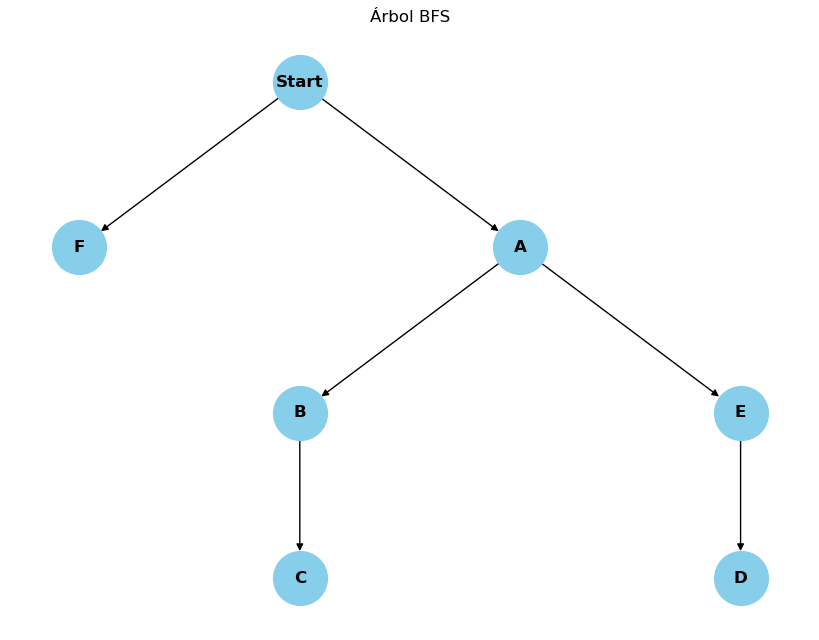

In [4]:
# graficación del arbol DFS
import networkx as nx
import matplotlib.pyplot as plt
primera_clave = next(iter(DFS_Tree))  # Obtener la primera clave
DFS_Tree.pop(primera_clave)  # Eliminar la primera clave
G = nx.DiGraph()                  # para no referencial a un padre vacio

# Agregar los nodos
G.add_nodes_from(["Start", "F", "A", "B", "E", "D", "C"])

# Agregar las relaciones al grafo
for hijo, padre in DFS_Tree.items():
    G.add_edge(padre, hijo)

# Dibujar el grafo con forma jerárquica
plt.figure(figsize=(8, 6))
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue",
        font_size=12, font_weight="bold", arrows=True)
plt.title("Árbol BFS")
plt.show()

### b) Nota: puede probar su algoritmo con el ejemplo visto en clase para probar el recorrido correcto de las ejecuciones DFS

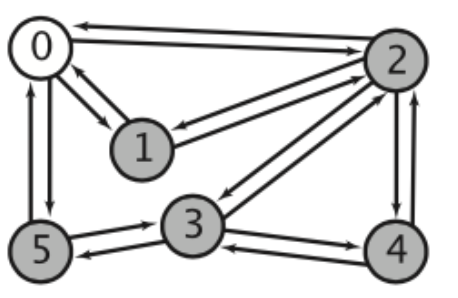

Con la explicación dada en el ejercicio 1 y a propósito de prueba, se toma el grafo dado en clase y se le pasa por el algoritmo definido en la función *DFS*.

In [5]:
# creación del diccionario graph_2 que almacenará el grafo del ejercicio planteado en clase
graph_2 = {
    0 : [2, 1, 5],
    1 : [0, 2],
    2 : [0, 1, 3, 4],
    3 : [5, 4, 2],
    4 : [3, 2],
    5 : [3, 0]
}

# definición del diccionario que almacenará los padres de cada nodo de graph_2
parent_2 = {
    0 : None,
    1 : None,
    2 : None,
    3 : None,
    4 : None,
    5 : None
}

# definición del diccionario que marcará a los nodos visitados
searched_2 = {
    0 : False,
    1 : False,
    2 : False,
    3 : False,
    4 : False,
    5 : False
}

In [6]:
# llamada a la función DFS
nodoStart = 0
print(searched_2)
path = []

DFS_Tree_2 = DFS(nodoStart, graph_2, searched_2, path, parent_2)

print(DFS_Tree_2)
print("La busqueda DFS es: ", path)

{0: False, 1: False, 2: False, 3: False, 4: False, 5: False}
{0: True, 1: False, 2: False, 3: False, 4: False, 5: False}
Los vecinos de 0 son [2, 1, 5]
{0: True, 1: False, 2: True, 3: False, 4: False, 5: False}
Los vecinos de 2 son [0, 1, 3, 4]
{0: True, 1: True, 2: True, 3: False, 4: False, 5: False}
Los vecinos de 1 son [0, 2]
Finaliza en  1
Vuelve a 2

{0: True, 1: True, 2: True, 3: True, 4: False, 5: False}
Los vecinos de 3 son [5, 4, 2]
{0: True, 1: True, 2: True, 3: True, 4: False, 5: True}
Los vecinos de 5 son [3, 0]
Finaliza en  5
Vuelve a 3

{0: True, 1: True, 2: True, 3: True, 4: True, 5: True}
Los vecinos de 4 son [3, 2]
Finaliza en  4
Vuelve a 3

Finaliza en  3
Vuelve a 2

Finaliza en  2
Vuelve a 0

{0: None, 1: 2, 2: 0, 3: 2, 4: 3, 5: 3}
La busqueda DFS es:  [0, 2, 1, 3, 5, 4]


El algoritmo, tal como sucedió en el anterior ejercicio, devuelve todos los nodos visitados hasta poder regresar, y al final retorna el diccionario parents y la ruta realizada. Después, se grafica el árbol requerido.

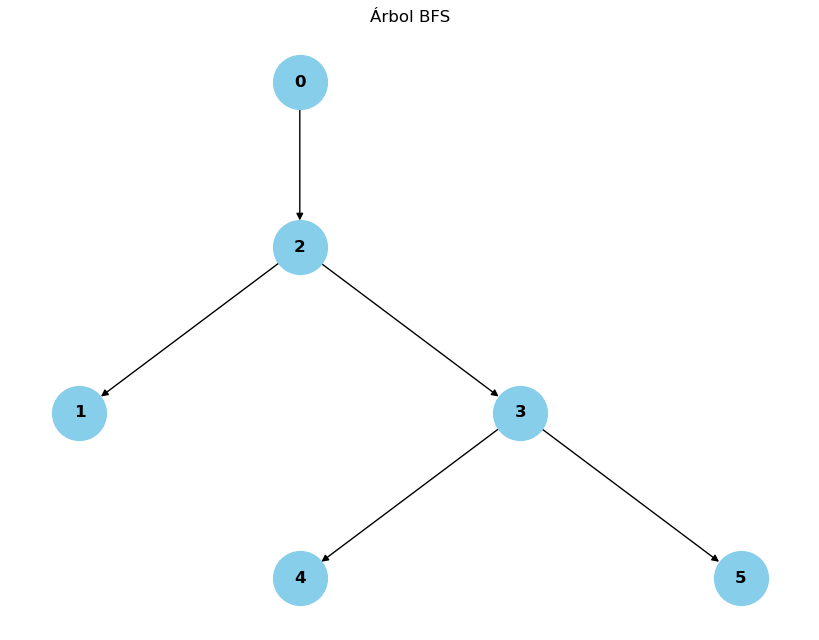

In [7]:
# graficación del arbol DFS
import networkx as nx
import matplotlib.pyplot as plt
primera_clave = next(iter(DFS_Tree_2))  # Obtener la primera clave
DFS_Tree_2.pop(primera_clave)  # Eliminar la primera clave
G = nx.DiGraph()                  # para no referencial a un padre vacio

# Agregar los nodos
G.add_nodes_from([0, 1, 2, 3, 4, 5])

# Agregar las relaciones al grafo
for hijo, padre in DFS_Tree_2.items():
    G.add_edge(padre, hijo)

# Dibujar el grafo con forma jerárquica
plt.figure(figsize=(8, 6))
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue",
        font_size=12, font_weight="bold", arrows=True)
plt.title("Árbol BFS")
plt.show()

### 4. Conclusiones

### 5. Referencias bibliográficas

### 6. Declaración uso de IA